In [10]:
from torchvision import datasets, transforms
import torch

# Define Transform
transform = transforms.Compose([
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


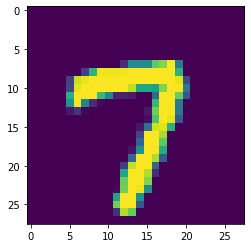

In [11]:
import matplotlib.pyplot as plt
import numpy as np

for image, label in trainloader:
    print(type(image))
    print(image.shape)
    print(label.shape)
    plt.imshow(image[1].numpy().squeeze())
    break

In [13]:
from torch import nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # Inputs to hidden layer 1
        self.hidden1 = nn.Linear(784, 128)
        # Inputs to hidden layer 2
        self.hidden2 = nn.Linear(128,64)
        # Output layer
        self.output = nn.Linear(64,10)
    
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x), dim=1)

        return x

model = Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [14]:
from torch import optim

model = nn.Sequential(nn.Linear(784, 128), 
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss
    else:
        print(f'Training loss: {running_loss/len(trainloader)}')

Training loss: 1.9320369958877563
Training loss: 0.8709933757781982
Training loss: 0.5182857513427734
Training loss: 0.42537882924079895
Training loss: 0.383755087852478


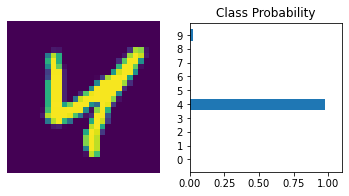

In [19]:
images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

with torch.no_grad():
    logits = model.forward(img)

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)